# Python notebook to walkthrough some abstract algebra and topology.

The purpose of this notebook is to discuss and explore some results in abstract algebra and topology, which are useful tools in many domains.  The idea is to work through some of the preliminary material (logic and set theory) to set the stage, with the final goal of being able to converse in the topics of abstract algebra and topology.  For example, to be able to discuss about groups, rings, fields, Galois theory, Elliptic Curves, manifolds, and so on, with some ability to extend the discussion.  Much of the material is derived from online materials such as wikipedia and so forth, with deviations or enhancements taken up as appropriate to aid the discussion.

## Main Sections

- Zeroth Order Logic
- First Order Logic
- Proofs
- Set Theory
- Elliptic Curves
- Orbits
- Lattice Points
- Topology
- The Langlands Program

## Zeroth Order Logic

Key Reference: https://en.wikipedia.org/wiki/Propositional_calculus

In order to say anything in terms of mathematics, it is necessary to discuss some of the machinery of logic, which is a tool for organizing thought.  Zeroth order logic is based on truth and falsehood of various statements referred to as propositions. It should be stated at the outset that sometimes logic can be "tricky" because it involves assumptions about how humans think, and therefore may seem vague or confusing at times.  The effort here will be to attempt to keep the discussion firmly grounded to the extent possible, such that ambiguity can be avoided.  Aspects of philosophy attempt to clarify these boundaries of thought, language, and reasoning (worth visiting).

To connect the discussion to mathematics, it is pointed out in the key reference, that mathematical formulas can be thought of as propositions (either true or false), which when connected together in a sequence lead to proofs of a theorem.  The devices that connect these propositions are called connectives.  Furthermore, it is important to think of the patterns of reasoning as being with respect to placeholders.  If a given pattern of reasoning is valid, then it will work for any object that is substituted for the placeholders.

### Some Definitions

$P$ is a proposition which may be true or false (both not both).  $\neg P$ is a proposition which is false when $P$ is true and true when $P$ is false.  It is called the negation of $P$.

$\mathbf{Conjunction}$:  We can combine two propositions into another proposition with a symbol called a conjunction operator like this, $P \land Q$ which is true when both propositions are true, and false otherwise.  The symbol can be remembered because it looks like the "A" in "And."

$\mathbf{Disjunction}$:  We can likewise combine two propositions into another proposition with a symbol called a disjunction operator like this, $P \lor Q$, which is true when at least one of the propositions are true.

$\mathbf{Implication}$:  We can combine two propositions into another proposition with a symbol called an implication operator like this, $P \implies Q$ which is true except when $P$ is false and $Q$ is true.

$\mathbf{Bidirectional Implication}$:  We can combine two propositions into another proposition with a symbole called bidirectional implication or sometimes called "if and only if" like this $P\iff Q$ which is true when $P$ and $Q$ are both true, or both are false.

Here are the truth tables that define these:

| $P$   |    $Q$  |$P \land Q$  |
|-------|---------|-------------|
|  F    |  F      |    F        |
|  F    |  T      |    F        |
|  T    |  F      |    F        |
|  T    |  T      |    T        |


| $P$   |    $Q$  |$P \lor  Q$  |
|-------|---------|-------------|
|  F    |  F      |    F        |
|  F    |  T      |    T        |
|  T    |  F      |    T        |
|  T    |  T      |    T        |


| $P$   |    $Q$  |$P \implies  Q$  |
|-------|---------|-----------------|
|  F    |  F      |    T            |
|  F    |  T      |    T            |
|  T    |  F      |    F            |
|  T    |  T      |    T            |


| $P$   |    $Q$  |$P \iff  Q$  |
|-------|---------|-------------|
|  F    |  F      |    T        |
|  F    |  T      |    F        |
|  T    |  F      |    F        |
|  T    |  T      |    T        |



Exercise:  

Prove $(P\lor Q)\iff (\neg P\implies Q)$

Solution:  (Using truth tables)

| $P$   |    $Q$  |$P \lor  Q$  | $\neg P$ | $\neg P\implies Q $|
|-------|---------|-------------|------------------------------
|  F    |  F      |    F        |   T      |       F          |
|  F    |  T      |    T        |   T      |       T          |
|  T    |  F      |    T        |   F      |       T          |
|  T    |  T      |    T        |   F      |       T          |


Since the third and fifth columns are identical, this completes the proof.

More details on truth tables:  https://en.wikipedia.org/wiki/Truth_table



It should be pointed out that the above definitions using truth tables should be used when assessing the truth or falsehood of particular propositions, instead of relying on natural language interpretations.  For example, sometimes the implication operator is expressed in natural language as "If P then Q", but because this suggests some sort of causal relation between P and Q, it is possible to become confused in cases where P is false and Q is true, which if you look at the truth table, still yields a overall value of truth.

Another tool are truth trees, which use graphical means to verify that a given proposition is true:  https://en.wikipedia.org/wiki/Method_of_analytic_tableaux


Also, Venn diagrams can depict the various relationships.
For example, consider a proposition being true equavalent to membership in a set P:

In [1]:
from matplotlib_venn import venn2
venn2(subsets = (1, 1, 1))

### Formal Systems

Formal Systems are a framework for reasoning with the following components:

1.  A set of symbols which form the "alphabet."
2.  A set of rules for combining the alphabet elements, which is called the "grammar."
3.  A set of axioms.
4.  A set of inference rules.

The term "well-formed formula" (wff) refers to correctly generated entities derived under the formal system.  In particular, any symbole from the alphabet is a wff.  Any rule applied to a wff is itself a wff.  And nothing else is.  By this framework, one can build up more and more complex wff's.  The set of all wff's is called the "language" of the formal system.

More details: https://en.wikipedia.org/wiki/Formal_system

Exercise:

Show that the truth table(function) for $P\land Q$ can be constructed from $\lor$ and $\neg$.

Solution:

We seek the following truth table

| $P$   |    $Q$  |$P \land Q$  |
|-------|---------|-------------|
|  F    |  F      |    F        |
|  F    |  T      |    F        |
|  T    |  F      |    F        |
|  T    |  T      |    T        |

If we consider the truth table for $P\lor Q$, we have

| $P$   |    $Q$  |$P \lor  Q$  |
|-------|---------|-------------|
|  F    |  F      |    F        |
|  F    |  T      |    T        |
|  T    |  F      |    T        |
|  T    |  T      |    T        |

By inspection, we can see that the result can be matched to $P \land Q$ if we negate both $P$ and $Q$, combine using the $\lor$ rule, and negate that result:

| $P$   |    $Q$  |$\neg P$  | $\neg Q$ |$\neg P \lor \neg Q$ | $\neg (\neg P \lor \neg Q)$ |
|-------|---------|----------|----------|---------------------|-----------------------------|
|  F    |  F      |    T     |    T     |        T            |            F                |
|  F    |  T      |    T     |    F     |        T            |            F                |
|  T    |  F      |    F     |    T     |        T            |            F                |
|  T    |  T      |    F     |    F     |        F            |            T                |

It should be noted that the combination of $\lor$ and $\neg$ can be thought of as primitive, in the sense they can be used to generate other rules, such as $\land$ as demonstrated.  This idea is used in digital logic design whereby one creates "Universal Logic Gates" then can generate all other logic.  (End of solution).

In propositional logic, a simple axiomatic system can be constructed with three axioms.  They are listed below and are taken as true:

1)  $ (p \implies (q \implies p)) $  
2)  $ ((p \implies (q \implies r)) \implies ((p \implies q) \implies (p \implies r))) $  
3)  $ ((\neg p \implies \neg q) \implies (p \implies q))$  

And modus ponens:
 $ p   \land   (p \implies q) $ then $p$
 
See http://us.metamath.org/mpeuni/mmset.html for more details.

Regarding proofs.  More will be said later, but it is worth pointing out the following.  Certain steps in a proof occur as a direct logical consequence of previous steps, meaning that they are a mechanical process which demonstrates the correctness (truth) of the particular step.  Then there are other steps which are placed in a proof that come from creativity, meaning that previous steps don't neccessarily dictate a given step should occur.  Rather, it is from experience, intuition, and also from knowing what you are trying to prove that might suggest a given step.  As an analogy, if you want to take a trip somewhere, the creative step is deciding where you want to go, and the mechanical step is how you get there.

## First Order Logic

First order logic builds on zeroth order logic by including universal and existential quantifiers:  "For all" and "There exists."

## Proofs

One of the objectives of this notebook is to gain experience doing mathematical proofs, so they we occur in various sections as relevant.  There are several basic types of proof in mathematics.  One is called an inductive proof, another is called proof by contradiction.  These are fairly widely used.  

Inductive proofs assume that something is true for a given member of a sequences, and then show this implies something is true for the next element in the sequence.  To complete the proof, the something is shown to be true for the first element of the sequence (by some direct means).

Proofs by contradiction work by assuming something is not true, working through some deductive steps until a contradiction is arrived at (meaning that a step occurs which implies the assumption is false, thus implying that the original something is true).

The best way to understand how to prove something is to try proving something and working through the steps.  We'll try to have lots of examples of this throughout the discussion.

### Proof systems

As introduced in the section above on zero order calculus, a useful resource is the following link which describes the proofs of many theorems in a very systematic fashion:  http://us.metamath.org/mpeuni/mmset.html.

It is helpful to see these theorems broken down in exacting detail and logic, to illustrate the process of proof.  Additionally, the link describes some key ideas such as axioms, theory of classes, and other within the context of proving theorems, in addition to explaining the axioms from zero-order calculus, first-order calculus, and set theory which underpin mathematics.

It is possible and desirable to keep clear as possible the axioms that being used in proofs.  That is to say that using precise and consistent definitions is important for clarity of discussion.  For example, the axioms of zero-order calculus and first-order calculus do not require the notion of a set, as described in set theory.  It is important to keep this in mind so as to avoid unclear or circular reasoning.

## Set Theory

Set theory is at the foundation of mathematics, so it will be useful to work through the main aspects.  This discussion follows the general framework of the Wikibook:  https://en.wikibooks.org/wiki/Set_Theory, although freely deviates as appropriate.

### Topics
- Sets
- Axioms
- Relations
- Orderings
- Zorn's Lemma and the Axiom of Choice
- Ordinals
- Cardinals
- Zermelo-Fraenkel Axiomatic Set Theory

###  Sets

#### Definitions:

$\mathbf{Set}$:  A collection of objects.  Symbolically, sets are written as $A = \{ object1, object2, ..., objectN \}$ in the case of finite sets.  Other ways to represent sets include using a predicate form, where any object $x$ which satisfies the predicate (i.e. makes it true) is a member of the set.  For example, $A = \{x \mid x {\text{ is even}} \}$, which is a way of representing the infinite set of even numbers in the previously indicated predicate form, where the predicate is "$x {\text{ is even}}$."  A subtle point is that the predicate is assumed to be understood.  In other words, we must know how to determine whether or not a given $x$ satisfies the predicate.

$\mathbf{Set Complement}$:  This set, written as $A^\complement $ or $\overline{A}$ or $A'$, consists of the set of elements that are not in $A$.  Usually, there is some "universe of discourse" which is the set of all elements under consideration, and the set $A$ itself will be a set within that universe, containing some elements, the rest of which are in the complement of $A$.

$\mathbf{Set Difference}$:  The difference of two sets, written as $A-B$, means any member of $B$ that is also in $A$ is not included in the set $A-B$.  This is sometimes written as $A \setminus B$.

$\mathbf{Subset}$:  A subset is a set wholly contained in another set, and is written as $A\subset B$, when $A$ is a subset of $B$.

$\mathbf{Empty Set}$:  This set, written as $\emptyset$, is the set consisting of no elements.

$\mathbf{Set Intersection}$:  This set is the elements that are in common to two or more sets.  It is typically written as $A \cap B$ for the case of two sets.  If two or more sets do not have any elements in common, they are said to be mutually exclusive.  The can be written as $A\cap B=\emptyset$, the empty set. 

$\mathbf{Set Union}$:  This set is the set of elements that are in all the sets under consideration.  It is typically written, in the case of two sets as $A \cup B$.  Note that this can be thought of as a set consisting of three mutually exclusive (sub)sets:  $A\setminus(A\cap B)$, $B\setminus(A\cap B)$, and $A\cap B$. 

###  Axioms

(1) Extensionality:

(2) Empty Set:

(3) Separation:

(4) Pair:

(5) Union:

(6) Power Set:

(7) Infinity:

(8) Replacement:

(9) Regularity:

(10) Choice:


#### Some useful relations:

- $A\cap B=B\cap A$

Proof:  
We begin by assuming (actually declaring) that an arbitrary element $x$ is in $A\cap B$.  The definition of $A\cap B$ tells us that $x$ is common to both sets $A$ and $B$.  Therefore we say that $x\in A$ and $x\in B$.  From the definition of $B\cap A$, we know that it contains elements which are common to both $B$ and $A$, that is, consisting of elements $y$ such that $y\in B$ and $y\in A$.  Since we know that $x$ is in both $A$ and $B$, it must also be one of the elements $y$, and this completes the first part of the proof.  For the second part, we assume that $x$ is an element of $B\cap A$, and show this implies that $x$ is an element of $A\cap B$, which will complete the proof.  From the definition of $B\cap A$, we know that $x\in B$ and $x\in A$.  Now, we have $A\cap B$ consists of elements $y$ that are both in $A$ and $B$.  Since we know that $x\in B$ and $x\in A$, we know that $x$ must be one of the elements $y$, thus completing the proof (Note that since $x$ was assumed to be arbitrary, it is true for all elements $x$.  We also used the axiom for set equality, which says that if two sets are subsets of each other, they are equal.  Also, a slightly subtle point was that we used the fact that the English meaning of "and" is symmetric (i.e. order doesn't matter of the items being referenced)- For example the following statements (1) & (2) are equivalent: (1) $x\in A$ and $x\in B$, (2) $x\in B$ and $x\in A$ ).    




- $A\cup B=B\cup A$

Proof:

We must show that the above two sets are equal.  This means that every element in the left hand set is in the right hand set and vice versa.  We begin by assuming that an arbitrary element $x$ is in $A\cup B$.  This tells us that $x$ is in one of the three mutually exclusive sets: $A\setminus(A\cap B)$, $B\setminus(A\cap B)$, and $A\cap B$.  Now, if we expand the right hand side, we see that it consists of elements $y$ which are in one of three mutually exclusive sets:  $B\setminus(B\cap A)$, $A\setminus(B\cap A)$, and $B\cap A$.  Now, from the earlier proof, we know that $A\cap B=B\cap A$, which implies the last group of sets is $B\setminus(A\cap B)$, $A\setminus(A\cap B)$, and $A\cap B$. Therefore, we can see that our $x$ must be the same as one of the $y$ in that it is assumed to be in one of the same mutually exclusive sets.  This completes the first part of the proof.  For the second part, we assume that $x$ is an element of $B\cup A$, and show this implies that $x$ is an element of $A\cup B$, which will complete the proof.  From the definition of $B\cup A$, we know that $x$ is in one of the following mutually exclusive sets:  $B\setminus(B\cap A)$, $A\setminus(B\cap A)$, and $B\cap A$. The definition of $A\cup B$ is a set of elements $y$ are in the mutually exclusive sets $A\setminus(A\cap B)$, $B\setminus(A\cap B)$, and $A\cap B$.  In particular, we know that since $A\cap B=B\cap A$, this last group of sets can be written as $A\setminus(B\cap A)$, $B\setminus(B\cap A)$, and $B\cap A$.  Since we know that $x$ must be in one of those sets, it is equal to one of the $y$ and thus contained in $A\cap B$ which completes the full proof.




----
For sets $A,B,C$:

$(A\cup B)\cup C=A\cup (B\cup C)$

Proof:  Using a similar approach to the proofs earlier, we begin by assuming that an arbitrary element $x$ is in $(A\cup B)\cup C$, which implies that $x$ is in one of the following mutually exclusive sets:  $(A\cup B)\setminus (A\cup B) \cap C$, $C \setminus (A\cup B) \cap C$, $(A\cup B) \cap C$.



$(A\cap B)\cap C=A\cap (B\cap C)$:

Proof:  Preceding as above, we begin by assuming that an arbitrary element $x$ is in $(A\cap B)\cap C$, which, from the definition tells us that ${\Big \{}x:x\in (A\cap B){\text{ and }}x\in C{\Big \}}$.  We further recursively expand the $(A\cap B)$ term to yield ${\Big \{}x:x\in A{\text{ and }}x\in B {\text{ and }}x\in C{\Big \}}$.  Since the definition of $A\cap (B\cap C)$ will yield the same expression, we see that $x$ will be in that set.  This completes the first part of the proof.  For the second part, we assume that $x$ is an arbitrary element in $A\cap (B\cap C)$ which, through the definition (and recursive expansion) tells us that ${\Big \{}x:x\in A{\text{ and }}x\in B {\text{ and }}x\in C{\Big \}}$.  The definition for $(A\cap B)\cap C$ will expand to the same result, which implies that $x$ is in that set, thus completing the proof.    

----
Union distributes over intersection and intersection distributes over union. That is, for sets $A,B,C$:

$A\cap (B\cup C)=(A\cap B)\cup (A\cap C)$:

Proof:  Begin by assuming that $x$ is in $A\cap (B\cup C)$, which by definition yields $ {\Big \{} x:x\in A {\text{ and }}x\in (B\cup C) {\Big \}}$.  Expanding $(B\cup C)$, we have $ {\Big \{} x:x\in A {\text{ and }}(x\in B {\text{ or }} x \in C) {\Big \}}$.  We have three mutually exclusive cases to consider:  (1) $x \in A {\text{ and }} x \in B$ or (2) $x \in A {\text{ and }} x \in C$ or (3) $x \in A {\text{ and }} x \in B {\text{ and }} x \in C $.  Looking at the right hand side, upon expansion we see that we have $x \in A {\text{ and }} x \in B$ or $x \in A {\text{ and }} x \in C$ or $x \in A {\text{ and }} x \in B {\text{ and }} x \in A {\text{ and }} x \in C$.  We can see this is equal to the earlier expansion, thus completing the first part of the proof.  Now we assume that $x$ is in $(A\cap B)\cup (A\cap C)$ for the second part of the proof.  From the definition, the means that we have $x \in A {\text{ and }} x \in B$ or $x \in A {\text{ and }} x \in C$ or $x \in A {\text{ and }} x \in B {\text{ and }} x \in A {\text{ and }} x \in C$.  We showed earlier that this is equal to the expansion of the left hand side, where we have made the following assumptions: (1) The order of statements in a sequence of "ands" doesn't matter (you can rearrange them as needed), and (2) $A \cap A = A$.  This completes the proof.   

$A\cup (B\cap C)=(A\cup B)\cap (A\cup C)$:  
  
Proof:  Begin by assuming that $x$ is in $A\cup (B\cap C)$, which by definition yields $ {\Big \{} x:x\in A {\text{ or }}x\in (B\cap C) {\Big \}}$.  Expanding $(B\cap C)$, we have $ {\Big \{} x:x\in A {\text{ or }}(x\in B {\text{ and }} x \in C) {\Big \}}$.  We have three mutually exclusive cases to consider:  (1) $x \in A$ or (2) $x \in B {\text{ and }} x \in C$ (3) $x \in A {\text{ and }} x \in B {\text{ and }} x \in C $.  Looking at the right hand side, upon expansion we see that we have $x \in A {\text{ or }} x \in B$ and $x \in A {\text{ or }} x \in C$.  This will give us nine possible results:  (1) $x \in A {\text { and }} x \in A$ or (2) $x \in A {\text{ and } } x \in C$ or (3) $x \in A {\text { and }} x \in A {\text{ and }} x \in C$ or (4) $x \in B {\text { and }} x \in A$ or (5) $x \in B {\text{ and } } x \in C$ or (6) $x \in B {\text { and }} x \in A {\text{ and }} x \in C$ or (7) $x \in A {\text{ and }} x \in B {\text{ and }} x \in A$ or (8) $x \in A {\text{ and } } x \in B {\text{ and } }x \in C$ or (9) $x \in A {\text { and }} x \in B {\text { and }} x \in A {\text{ and }} x \in C$.

Simplifying the redundencies, we have:
(1) $x \in A$ or (2) $x \in A {\text{ and } } x \in C$ or (3) $x \in B {\text { and }} x \in A$ or (4) $x \in B {\text{ and } } x \in C$ or (5) $x \in B {\text { and }} x \in A {\text{ and }} x \in C$.



(Rest of proof...)

###  Zermelo-Fraenkel Axiomatic Set Theory

Extensionality: two sets with the same elements are equal.
$ \forall x,y,z:(z\in x\iff z\in y)\Rightarrow x=y$ $ \forall x,y,z:(z\in x\iff z\in y)\Rightarrow x=y$

Separation: subsets exist
$ \forall y_{1},p\,\exists y_{2}:\forall x:x\in y_{2}\iff (p\land x\in y_{1})$ $ \forall y_{1},p\,\exists y_{2}:\forall x:x\in y_{2}\iff (p\land x\in y_{1})$
where $ p $ is any proposition

The empty set exists
$ \exists x:\forall y:y\notin x$ $ \exists x:\forall y:y\notin x$

Union: the union of all members of a set is a set.
$ \forall x\,\exists y:\forall z:z\in y\iff (\exists u:z\in u\land u\in x)$ $ \forall x\,\exists y:\forall z:z\in y\iff (\exists u:z\in u\land u\in x)$

Power sets exist
$ \forall x\,\exists y:\forall z:z\in y\iff (\forall t:t\in z\Rightarrow t\in x)$ $ \forall x\,\exists y:\forall z:z\in y\iff (\forall t:t\in z\Rightarrow t\in x)$
we denote this set y by $ P(x)$

Infinity: an infinite set exists
$ \exists x:(\varnothing \in x)\land (\forall y:y\in x\Rightarrow P(y)\in x)$ $ \exists x:(\varnothing \in x)\land (\forall y:y\in x\Rightarrow P(y)\in x)$

Foundation, no set is a member of itself
$ \forall x:x\neq \varnothing \Rightarrow (\exists y\in x:y\cap x=\varnothing )$ $ \forall x:x\neq \varnothing \Rightarrow (\exists y\in x:y\cap x=\varnothing )$

## Elliptic Curves

Elliptic curves are defined in the following standard way:

$y^2 = x^3+Ax+B$

Elliptic curves have a number of very interesting properties which have brought them a great deal of attention.  One main property is that rational points on the elliptic curve (i.e. x and y are rational) form a "group."  The most general way to discuss elliptic curves is in the space of $\mathbb{C}^2$, the space of two complex variables.  That is to say that y and x are to be thought of as complex variables.


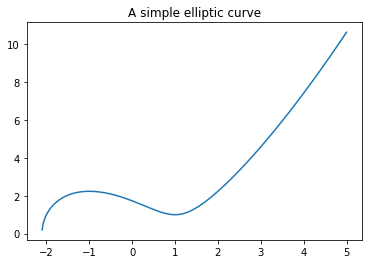

In [2]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
x = np.linspace(-2.1, 5, 500)
A = -3.0
B = 3.0
plt.plot(x, (x**3+A*x+B)**0.5)
plt.title('A simple elliptic curve')

## The Langlands Program

Mathematician Robert Langlands has laid out a set of questions or areas of research that cross both pure mathematics and physics.  There are five components to this program, which Langland's himself provides some guidance towards potential routes for addressing (https://www.youtube.com/watch?v=3fAHRV20ioA&list=PLOu9EKD3tOEa2n8_KJcBVbUMoLtu9I_zg&index=26).